In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
athlets = pd.read_csv(r"X:\Data Science\Pro_Projects\Data store\athlete_events.csv")
athlets


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [ ]:
region = pd.read_csv(r"X:\Data Science\Pro_Projects\Data store\noc_regions.csv")
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [ ]:
def preprocess(athlets,region):
    # filtering for summer olympics
    df = athlets[athlets['Season'] == 'Summer']
    # merge with region_df
    df = df.merge(region, on='NOC', how='left')
    # dropping duplicates
    df.drop_duplicates(inplace=True)
    # one hot encoding medals
    df = pd.concat([df, pd.get_dummies(df['Medal']).astype(int)], axis=1)
    return df

In [ ]:
df =preprocess(athlets, region)

In [ ]:
def athlets_country(df, selected_country, selected_year):
    # Filter by country, year, and non-zero medal counts
    country_athletes = df[
        (df['region'] == selected_country) &
        (df['Year'] == selected_year) &
        ((df['Gold'] > 0) | (df['Silver'] > 0) | (df['Bronze'] > 0))
    ][['Name', 'Age', 'Gold', 'Silver', 'Bronze']]

    # Sort by Gold medals and select top 10
    country_athletes = country_athletes.sort_values('Gold', ascending=False).head(10)

    return country_athletes

# Example usage
athlets_country(df, 'India', 2016)


,Name,Age,Gold,Silver,Bronze
121136,Sakshi Malik,23.0,0,0,1
181485,"Pusarla Venkata ""P. V."" Sindhu",21.0,0,1,0


In [ ]:
# Merging the data
athlets_region = athlets.merge(region, how='left', on='NOC')
athlets_region.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [ ]:
df = athlets_region.drop_duplicates(subset=['Team', 'region', 'Games', 'Year', 'Sport', 'Event', 'Medal'])
df


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271095,135559,Pawe Jan Zygmunt,M,25.0,182.0,79.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Speed Skating,"Speed Skating Men's 5,000 metres",NaN,Poland,NaN
271096,135559,Pawe Jan Zygmunt,M,29.0,182.0,79.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Speed Skating,"Speed Skating Men's 5,000 metres",NaN,Poland,NaN
271097,135559,Pawe Jan Zygmunt,M,29.0,182.0,79.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Speed Skating,"Speed Skating Men's 10,000 metres",NaN,Poland,NaN
271098,135559,Pawe Jan Zygmunt,M,33.0,182.0,79.0,Poland,POL,2006 Winter,2006,Winter,Torino,Speed Skating,"Speed Skating Men's 5,000 metres",NaN,Poland,NaN


In [ ]:
df[['Name','Age','Sport', 'Event', 'Medal'  ]][(df['region'] == 'India')&(df['Year'] == 2016)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
1185,663,Sharath Kamal Achanta,M,34.0,186.0,85.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Table Tennis,Table Tennis Men's Singles,NaN,India,NaN
8201,4523,Seema Antil,F,33.0,182.0,92.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Discus Throw,NaN,India,NaN
10177,5562,Aditi Ashok,F,18.0,173.0,57.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Golf,Golf Women's Individual,NaN,India,NaN
10731,5868,Manu Attri,M,23.0,172.0,73.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Men's Doubles,NaN,India,NaN
11772,6427,Lalita Shivaji Babar,F,27.0,166.0,50.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Women's 3,000 metres Steeplechase",NaN,India,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221771,111467,Sathish Kumar Sivalingam,M,24.0,175.0,77.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Men's Middleweight,NaN,India,NaN
238350,119515,Shiva Thapa,M,22.0,169.0,56.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Bantamweight,NaN,India,NaN
241309,120871,Sandeep Tomar,M,25.0,168.0,61.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,India,NaN
264077,132143,Vikas Krishan Yadav,M,24.0,177.0,69.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Middleweight,NaN,India,NaN


In [ ]:
athlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


In [ ]:
athlets.duplicated().sum()

1385

In [ ]:
athlets = athlets[athlets['Season'] == 'Summer']

In [ ]:
athlets.drop_duplicates(inplace=True)

In [ ]:
athlets.duplicated().sum()

0

In [ ]:
medals = pd.get_dummies(athlets['Medal']).astype(int)
medals

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
26,0,0,0
...,...,...,...
271106,0,0,0
271107,0,0,0
271108,0,0,0
271109,0,0,0


In [ ]:
def fetch_medal_tally(athlets, year, country):

    df = athlets.drop_duplicates(subset=['Team', 'region', 'Games', 'Year', 'Sport', 'Event', 'Medal'])
    flag = 0
    # Filter for overall cases
    if year == 'overall' and country == 'overall':
        pass  # Use the whole DataFrame

    elif year == 'overall' and country != 'overall':
        flag = 1
        df = df[df['region'] == country]  # Use the actual country variable

    elif year != 'overall' and country == 'overall':
        df = df[df['Year'] == year]  # Use the actual year variable

    elif year != 'overall' and country != 'overall':
        df = df[(df['Year'] == year) & (df['region'] == country)]  # Use actual values

    # Grouping and calculating medal counts
    if flag == 1:
        medals = pd.get_dummies(df['Medal']).astype(int)
        df = pd.concat([df, medals], axis=1)
        x = df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
        x["total"] = x["Gold"] + x["Silver"] + x["Bronze"]
    else:
        medals = pd.get_dummies(df['Medal']).astype(int)
        df = pd.concat([df, medals], axis=1)
        x = df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()
        x["total"] = x["Gold"] + x["Silver"] + x["Bronze"]

    return x



In [ ]:
athlets = pd.concat([athlets, medals], axis=1)
athlets.head()

NameError: name 'medals' is not defined

In [ ]:
athlets_region.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

KeyError: "None of [Index(['Gold', 'Silver', 'Bronze'], dtype='object')] are in the [columns]"

In [ ]:
athlets = athlets.drop_duplicates(subset=['Team','region','Games','Year','Sport','Event', 'Medal'])

In [ ]:
medals_tally =athlets.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold',ascending=False).reset_index()
medals_tally

,region,Gold,Silver,Bronze
0,USA,1035,802,708
1,Russia,592,498,487
2,Germany,444,457,491
3,UK,278,317,300
4,France,234,256,287
...,...,...,...,...
200,Lesotho,0,0,0
201,Albania,0,0,0
202,Libya,0,0,0
203,Liechtenstein,0,0,0


In [ ]:
medals_tally

,region,Gold,Silver,Bronze
0,USA,1035,802,708
1,Russia,592,498,487
2,Germany,444,457,491
3,UK,278,317,300
4,France,234,256,287
...,...,...,...,...
200,Lesotho,0,0,0
201,Albania,0,0,0
202,Libya,0,0,0
203,Liechtenstein,0,0,0


In [ ]:
medals_tally['toatal'] = medals_tally['Gold']+medals_tally['Silver']+medals_tally['Bronze']
medals_tally

,region,Gold,Silver,Bronze,toatal
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777
...,...,...,...,...,...
200,Lesotho,0,0,0,0
201,Albania,0,0,0,0
202,Libya,0,0,0,0
203,Liechtenstein,0,0,0,0


In [ ]:
athlets.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes',
       'Bronze', 'Gold', 'Silver'],
      dtype='object')

In [ ]:
country =athlets['region'].dropna()
country = country.unique()
country = country.tolist()
country.sort()
country.insert(0,'Overall')
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [ ]:
year =athlets['Year'].dropna()
year = year.unique().tolist()
year.sort()
year.insert(0,'Overall')
year

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [ ]:
def fetch_medal_tally(athlets, year, country):

    df = athlets.drop_duplicates(subset=['Team', 'region', 'Games', 'Year', 'Sport', 'Event', 'Medal'])
    flag = 0
    # Filter for overall cases
    if year == 'overall' and country == 'overall':
        pass  # Use the whole DataFrame

    elif year == 'overall' and country != 'overall':
        flag = 1
        df = df[df['region'] == country]  # Use the actual country variable

    elif year != 'overall' and country == 'overall':
        df = df[df['Year'] == year]  # Use the actual year variable

    elif year != 'overall' and country != 'overall':
        df = df[(df['Year'] == year) & (df['region'] == country)]  # Use actual values

    # Grouping and calculating medal counts
    if flag == 1:
        x = df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
        x["total"] = x["Gold"] + x["Silver"] + x["Bronze"]
    else:
      x = df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()
      x["total"] = x["Gold"] + x["Silver"] + x["Bronze"]

    return x


In [ ]:
fetch_medal_tally(athlets,year = 'overall',country =  'overall')

,region,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777
...,...,...,...,...,...
200,Lesotho,0,0,0,0
201,Albania,0,0,0,0
202,Libya,0,0,0,0
203,Liechtenstein,0,0,0,0


**Overall Analysis**
1. No of Editions
2. No of cities
3. No of Events/Sports
4. No of Athlets
5. participating cities

In [ ]:
#No of Editions

Editions = athlets['Year'].unique().shape[0]-1
Editions

28

In [ ]:
#No of cities
cities = athlets['City'].unique().shape[0]

In [ ]:
# No of Events/Sports

sports = athlets['Sport'].unique().shape[0]
sports

52

In [ ]:
# No of Events
Events = athlets['Event'].unique().shape[0]
Events

651

In [ ]:
countries = athlets['region'].unique().shape[0]
countries

206

**Nations over Time**

In [ ]:
Nations_over_time =athlets.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')

Nations_over_time.rename(columns={'Year':'Year','count':'Countries'},inplace=True)
Nations_over_time


,Year,Countries
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
24,1912,29
23,1920,29
21,1924,45
20,1928,46
19,1932,47


In [ ]:
import plotly.express as px
fig =px.line(Nations_over_time, x = 'Year', y = 'Countries')
fig.show()


In [ ]:
a = athlets.drop_duplicates(['Year','Sport','Event'])
a.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


<Axes: xlabel='Year', ylabel='Sport'>

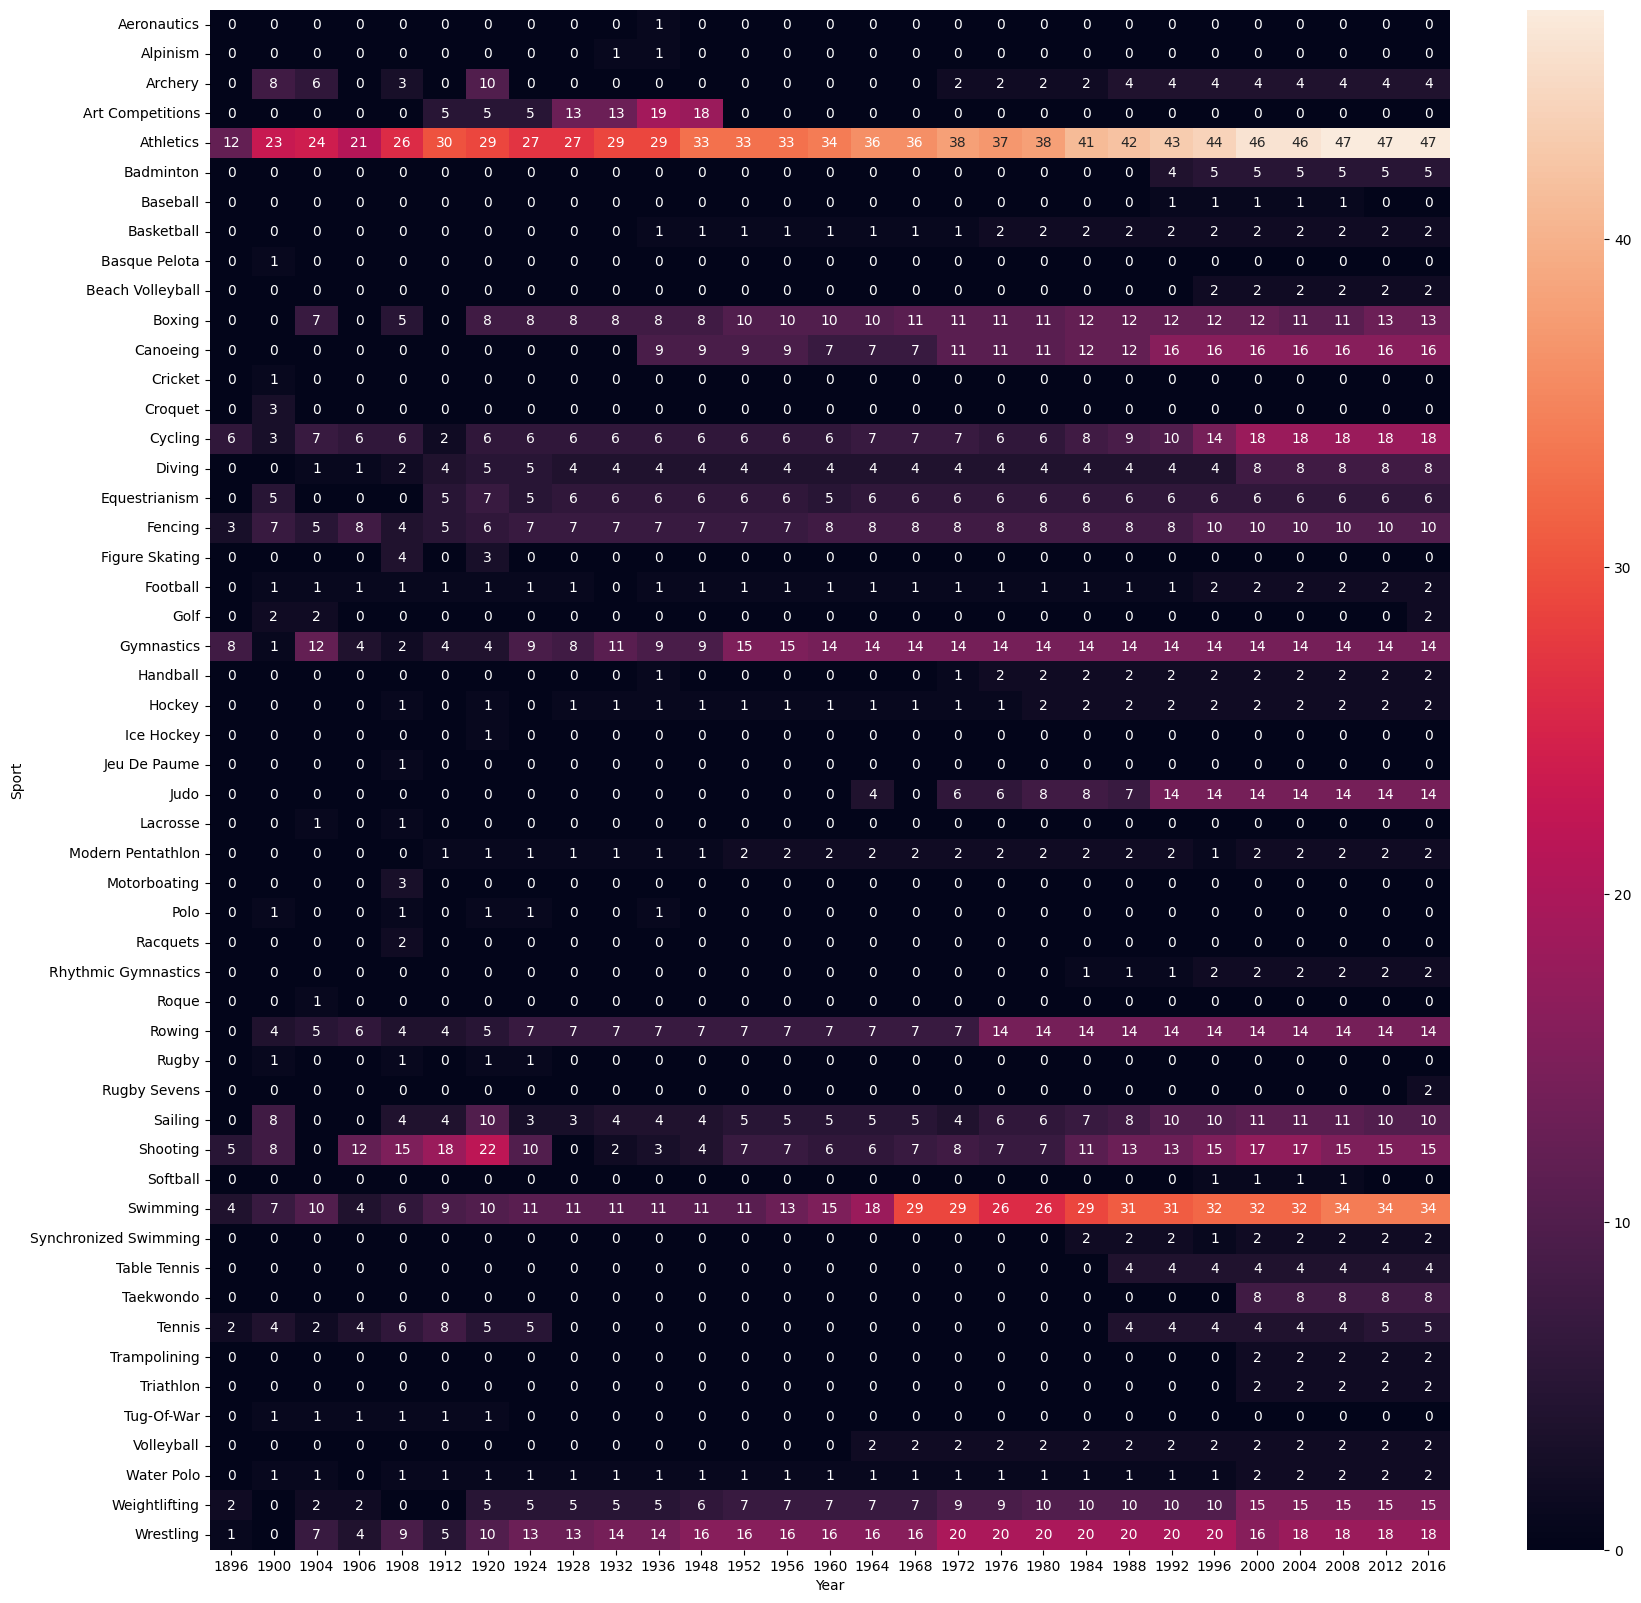

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(a.pivot_table(index = 'Sport', columns = 'Year', values = 'Event', aggfunc = "count").fillna(0), annot = True)

In [ ]:
athlets.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [ ]:
b = athlets.dropna(subset =['Medal'])
c = b['Name'].value_counts().reset_index().head(15).merge(athlets, left_on= 'Name', right_on = 'Name', how = 'left')[['Name','count', 'Sport', 'region']].drop_duplicates('Name')
c.rename(columns={'count': 'Medals'}, inplace = True)
c

,Name,Medals,Sport,region
0,"Michael Fred Phelps, II",16,Swimming,USA
18,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
42,Larysa Semenivna Latynina (Diriy-),14,Gymnastics,Russia
56,Birgit Fischer-Schmidt,11,Canoeing,Germany
68,Aleksey Yuryevich Nemov,10,Gymnastics,Russia
78,Polina Hryhorivna Astakhova,10,Gymnastics,Russia
97,Vra slavsk (-Odloilov),10,Gymnastics,Czech Republic
110,Takashi Ono,10,Gymnastics,Japan
121,"Raymond Clarence ""Ray"" Ewry",10,Athletics,USA
131,Nadia Elena Comneci (-Conner),9,Gymnastics,Romania


In [ ]:
athlets.columns



Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes',
       'Bronze', 'Gold', 'Silver'],
      dtype='object')

In [ ]:
def Most_successful(athlets, sports):
    # Drop rows without medals
    b = athlets.dropna(subset=['Medal'])

    # Filter by sport if not 'overall'
    if sports != 'overall':
        b = b[b['Sport'] == sports]

    # Count medals per athlete
    medal_counts = b['Name'].value_counts().reset_index()
    medal_counts.columns = ['Name', 'Medals']

    # Merge with original data to get additional info
    result = medal_counts.merge(athlets[['Name', 'Sport', 'region']], on='Name', how='left').drop_duplicates('Name')

    # Select the top 15 athletes
    result = result.head(15)

    return result


In [ ]:
Most_successful(athlets, 'Judo')

,Name,Medals,Sport,region
0,Ryoko Tamura-Tani,5,Judo,Japan
5,Driulys Gonzlez Morales,4,Judo,Cuba
10,Angelo Parisi,4,Judo,UK
14,Mark Huizinga,3,Judo,Netherlands
18,Idalys Ortz Bocourt,3,Judo,Cuba
21,Kye Sun-Hui,3,Judo,North Korea
25,Amarilys Savn Carmenate,3,Judo,Cuba
29,Edith Bosch,3,Judo,Netherlands
33,Tadahiro Nomura,3,Judo,Japan
36,Rishod Rashidovich Sobirov,3,Judo,Uzbekistan


**Country-wise Analysis**
1. Countrywise medal tally per year(line plot)
2. what countries are good at heatmap
3. Most suceesful Athlets(10)

In [ ]:
df = athlets.dropna(subset=['Medal'])
df.drop_duplicates(subset = ['Team', 'NOC', 'Games', 'Year', 'City','Sport', 'Event', 'Medal'], inplace = True)

In [ ]:
new =df[df["region"] == "India"]
new = new.groupby('Year').count()['Medal'].reset_index()
new

,Year,Medal
0,1900,2
1,1928,1
2,1932,1
3,1936,1
4,1948,1
5,1952,2
6,1956,1
7,1960,1
8,1964,1
9,1968,1


In [ ]:
new


,Year,Medal
0,1900,2
1,1928,1
2,1932,1
3,1936,1
4,1948,1
5,1952,2
6,1956,1
7,1960,1
8,1964,1
9,1968,1


In [ ]:
athlets.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [ ]:


def country_wise_analysis(athlets, country):
    # Drop rows where Medal is missing
    H = athlets.dropna(subset=['Medal'])

    # Remove duplicates based on specific columns
    H.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'], inplace=True)

    # Filter data for the selected country
    H_new = H[H['region'] == country]

    # Create pivot table to count medals per sport per year
    pivot_data = H_new.pivot_table(index='Sport', columns='Year', values='Medal', aggfunc='count').fillna(0)

    # Plot the heatmap
    plt.figure(figsize=(20, 20))
    pt = sns.heatmap(pivot_data, annot=True, cmap='Blues', linewidths=.5)
    plt.title(f"Medal Count for {country} Over the Years", fontsize=16)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Sport", fontsize=12)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

    return pt


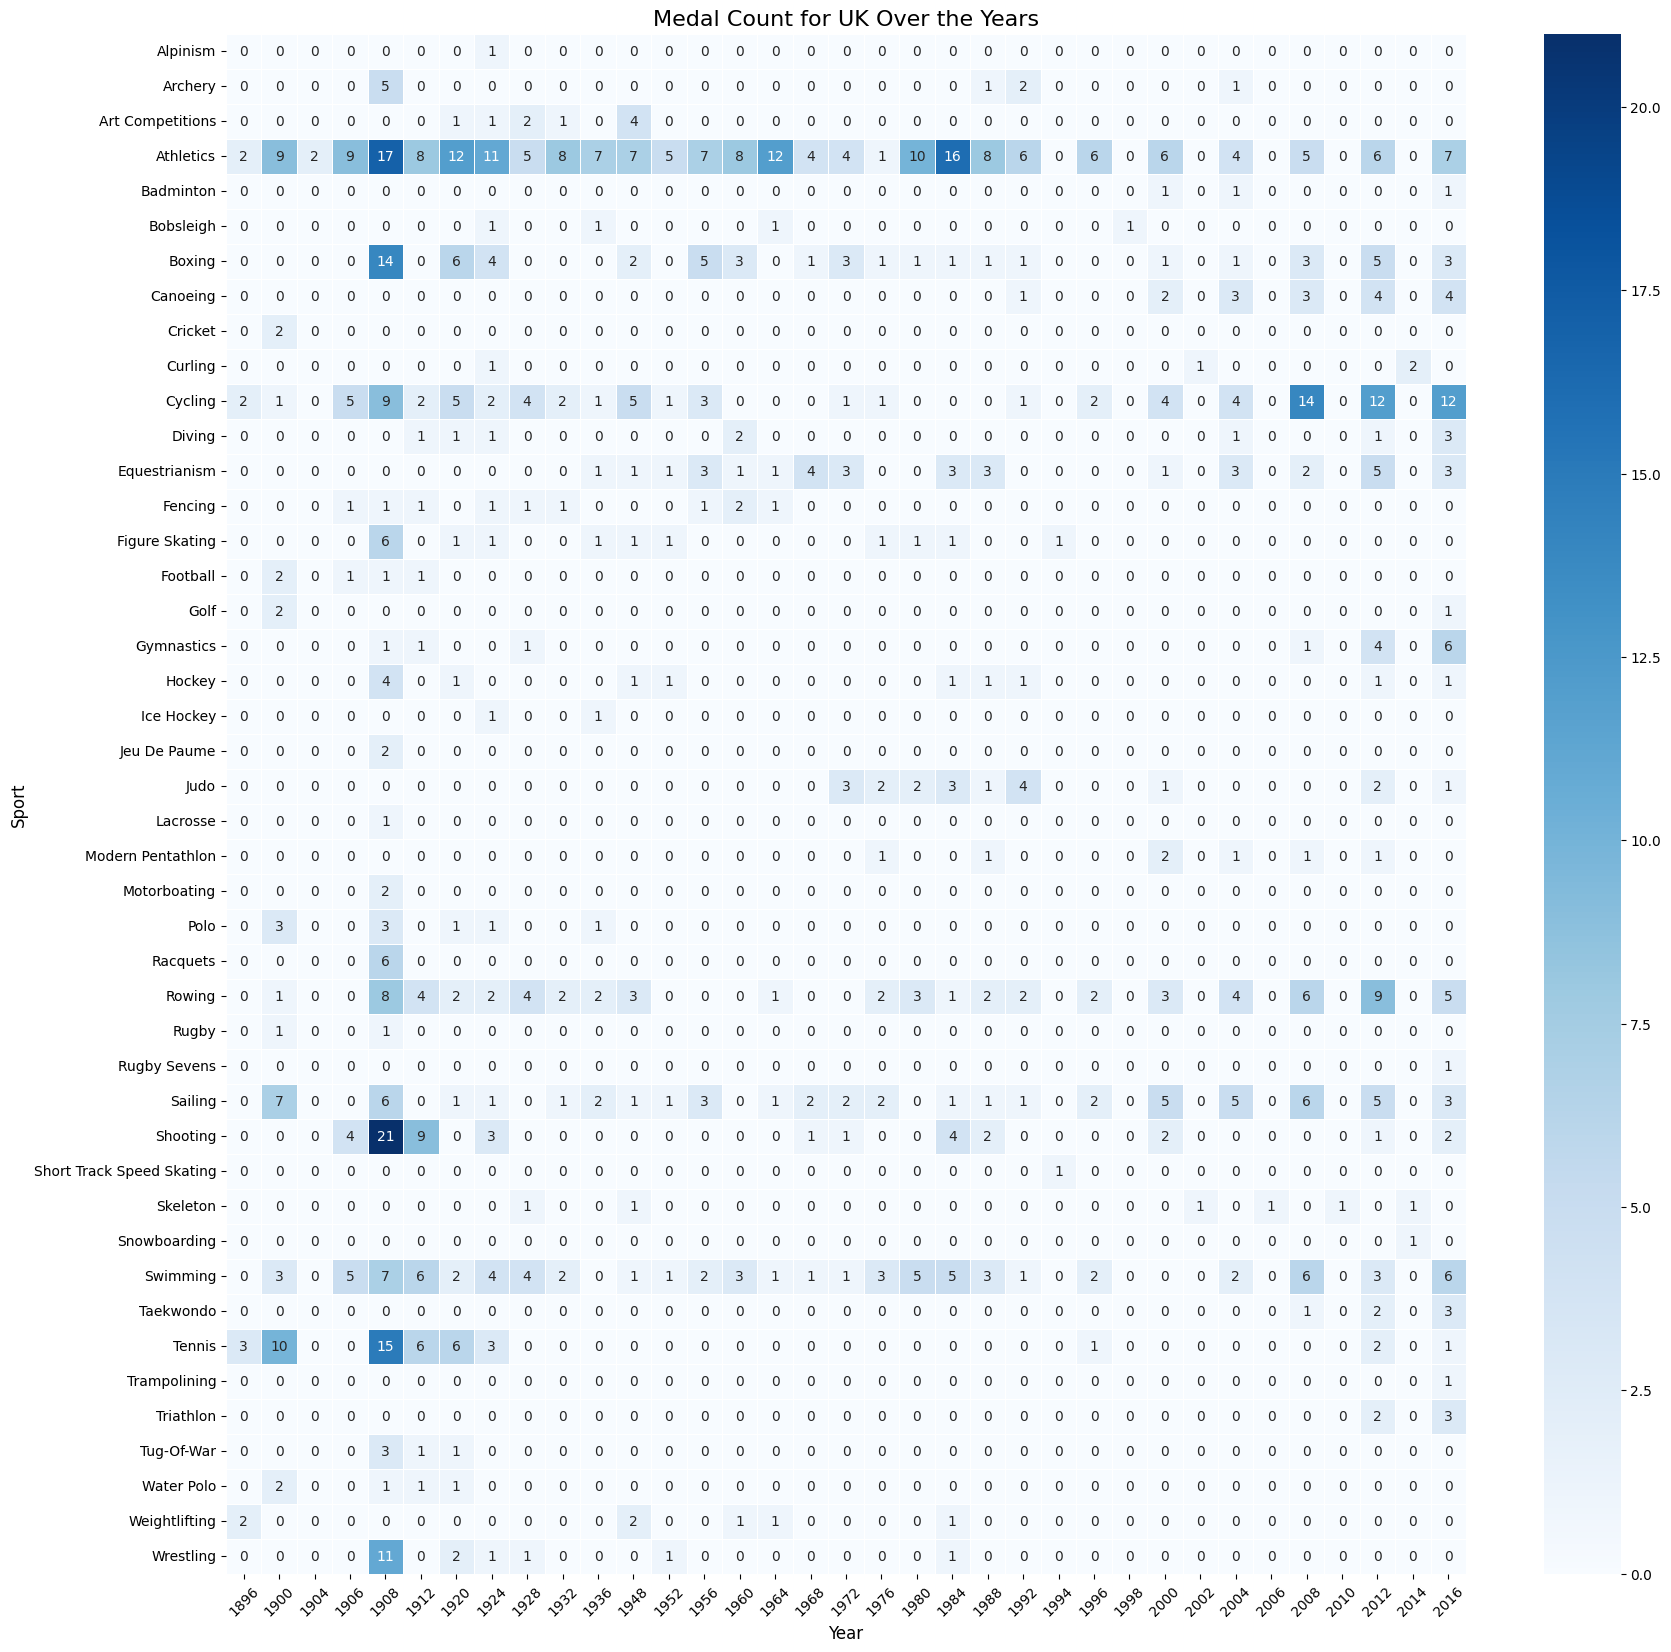

<Axes: title={'center': 'Medal Count for UK Over the Years'}, xlabel='Year', ylabel='Sport'>

In [ ]:
country_wise_analysis(athlets, 'UK')

**Country-wist Most successful Athlets**

In [ ]:

def Country_wise_Most_successful(athlets, country):
    # Drop rows without medals
    b = athlets.dropna(subset=['Medal'])


    b = b[b['region'] == country]

    # Count medals per athlete
    medal_counts = b['Name'].value_counts().reset_index()
    medal_counts.columns = ['Name', 'Medals']

    # Merge with original data to get additional info
    result = medal_counts.merge(athlets[['Name', 'Sport']], on='Name', how='left').drop_duplicates('Name')

    # Select the top 15 athletes
    result = result.head(15)

    return result


In [ ]:
Country_wise_Most_successful(athlets, 'UK')

,Name,Medals,Sport
0,Henry Taylor,8,Swimming
12,Bradley Marc Wiggins,8,Cycling
23,"Christopher Andrew ""Chris"" Hoy",7,Cycling
32,Jason Francis Kenny,7,Cycling
39,"Stephen Geoffrey ""Steven"" Redgrave",6,Rowing
45,John Arthur Jarvis,6,Water Polo
52,Jack Beresford,5,Rowing
57,"Kathleen ""Kitty"" McKane (-Godfree)",5,Tennis
63,Max Antony Whitlock,5,Gymnastics
75,"Charles Benedict ""Ben"" Ainslie",5,Sailing


**Athletes wise analysis**

In [ ]:
import plotly.figure_factory as ff

athletes_new = athlets.drop_duplicates(subset= ['Name', "region"])
p1 =athletes_new['Age'].dropna()
p2 =athletes_new[athletes_new['Medal'] == 'Gold']['Age'].dropna()
p3 = athletes_new[athletes_new['Medal'] == 'Silver']['Age'].dropna()
p4 = athletes_new[athletes_new['Medal'] == 'Bronze']['Age'].dropna()

In [ ]:
fig = ff.create_distplot([p1,p2,p3,p4],["Overall Age", 'Gold Medalist', 'Silver Medalist', 'Bronze'], show_hist = False, show_rug = False)
fig.show()